In [1]:
import json
import tensorflow as tf
#import tensorflow.keras.optimizers import RMSprop

# Reading the data from the json file

In [2]:
with open('sarcasm.json','r') as f:
    datastore = json.load(f)
    
    
sentences = []
labels = []
#urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    #urls.append(item['article_link'])

# Tokenzing the words from the sentences

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [24]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [33]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [34]:
word_index = tokenizer.word_index

In [36]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

In [37]:
print (training_sentences[2])
print (training_padded[2])

mom starting to fear son's web series closest thing she will have to grandchild
[ 153  890    2  891 1445 2215  595 5650  221  133   36   45    2 8864
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


# Building a simple model

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
]
)

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
num_epochs = 20
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels))

Train on 20000 samples, validate on 6709 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20000/20000 [==============================] - 1s 69us/sample - loss: 0.6654 - acc: 0.5918 - val_loss: 0.5895 - val_acc: 0.7742
Epoch 2/20
20000/20000 [==============================] - 1s 54us/sample - loss: 0.4499 - acc: 0.8271 - val_loss: 0.3943 - val_acc: 0.8372
Epoch 3/20
20000/20000 [==============================] - 1s 54us/sample - loss: 0.3228 - acc: 0.8714 - val_loss: 0.3555 - val_acc: 0.8511
Epoch 4/20
20000/20000 [==============================] - 1s 54us/sample - loss: 0.2696 - acc: 0.8942 - val_loss: 0.3419 - val_acc: 0.8572
Epoch 5/20
20000/20000 [==============================] - 1s 54us/sample - loss: 0.2327 - acc: 0.9097 - val_loss: 0.3442 - val_acc: 0.8562
Epoch 6/20
20000/20000 [==============================] - 1s 54us/sample - loss: 0.2063 - acc: 0.9220 - val_loss: 0.3573 - val_acc: 0.8451
Epoch 7/20
20000/20000 [==============================] - 1s 58us/sam

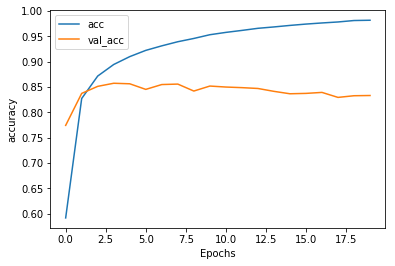

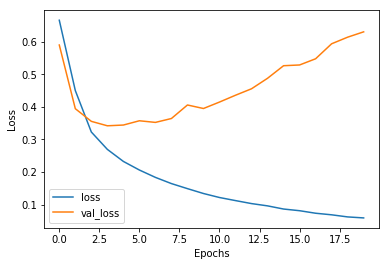

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['acc','val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])
plt.show()


In [63]:
reverse_word_index = dict((value,key) for (key,value) in word_index.items())


def decoded_senetences(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

print (decoded_senetences(training_padded[0]))
print (training_sequences[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]


In [68]:
e = model.layers[0]
weights = e.get_weights()[0]
print (weights.shape)

(10000, 16)
